In [1]:
from os import listdir
from os.path import isdir
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing

Tratamento de dados

In [2]:
def select_image(path):
  image = Image.open(path)
  image = image.convert("RGB")
  image = image.resize((100,100))
  # print(path)
  return np.asarray(image) #Transforma imagem em um array

In [3]:
def load_classes(diretorio, classe, imagens, labels):

  #Listar todo os arquivos dentro do diretorio(ex."training_set\\cats")
  for filename in listdir(diretorio): 
    path = diretorio + filename
    # print(path)

    try:
      imagens.append(select_image(path)) #Normalizar a imagem e juntar na Lista
      labels.append(classe)
    except:
      print(f"!!!Nao foi possivel carregar a imagem {path}!!!")
      
  return imagens, labels

In [4]:
def select_data_set(diretorio):

  imagens = list()
  labels = list()

  #listar por subdiretorios dentro de diretorio(ex."training_set\\")
  for subdir in listdir(diretorio):
    path = diretorio + subdir + '\\' 
    if not isdir(path):
      print(f"{path} is not directory")
      continue

    imagens, labels = load_classes(path, subdir, imagens, labels) #Carregar classes de determinada pasta
  

  return imagens, labels


In [5]:
def viewData(imagens, labels):

  plt.figure(figsize=(10,10))
  grid_size = min(250, len(imagens))

  for i in range(grid_size):

    plt.subplot(50, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagens[i*20], cmap=plt.cm.binary)
    plt.xlabel(labels[i*20])

Carregar dataset e labels

In [6]:
#Dataset de treinamento
animals_dataset = "training_set\\"

#Definindo e separando imagens/labels de treino
train_imagens, train_labels = select_data_set(animals_dataset)
train_imagens = np.array(train_imagens)/255.0  ## Normalizando a imagem
train_labels = np.array(train_labels)
print(train_labels)
lb = preprocessing.LabelBinarizer()
train_labels = lb.fit_transform(train_labels)

# viewData(imagens, labels)
# plt.show()

['bird' 'bird' 'bird' ... 'dogs' 'dogs' 'dogs']


In [7]:
animals_dataset = "test_set\\"
test_imagens, test_labels = select_data_set(animals_dataset)
test_imagens = np.array(test_imagens)/255.0  ## convertendo de lista para array
test_labels = np.array(test_labels)
lb = preprocessing.LabelBinarizer()
test_labels = lb.fit_transform(test_labels)

Treinamento da rede

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
# model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0

In [11]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [learning_rate_reduction]                                           

In [14]:
history = model.fit(train_imagens, train_labels, epochs=50, callbacks=callbacks, validation_data=(test_imagens, test_labels))

Epoch 1/50
353/353 [==============================] - 24s 41ms/step - loss: 0.9771 - acc: 0.6012 - val_loss: 1.5618 - val_acc: 0.4243
Epoch 2/50
353/353 [==============================] - 10s 28ms/step - loss: 0.6686 - acc: 0.7084 - val_loss: 0.7669 - val_acc: 0.6519
Epoch 3/50
353/353 [==============================] - 9s 26ms/step - loss: 0.5621 - acc: 0.7599 - val_loss: 0.7214 - val_acc: 0.6832
Epoch 4/50
353/353 [==============================] - 9s 26ms/step - loss: 0.4994 - acc: 0.7910 - val_loss: 0.5794 - val_acc: 0.7554
Epoch 5/50
353/353 [==============================] - 9s 26ms/step - loss: 0.4339 - acc: 0.8202 - val_loss: 0.5551 - val_acc: 0.7776
Epoch 6/50
353/353 [==============================] - 9s 26ms/step - loss: 0.3877 - acc: 0.8417 - val_loss: 0.8543 - val_acc: 0.6697
Epoch 7/50
353/353 [==============================] - 9s 26ms/step - loss: 0.3459 - acc: 0.8565 - val_loss: 0.6203 - val_acc: 0.7308
Epoch 8/50
353/353 [==============================] - 9s 26ms/step 

In [15]:
# i=0
predictions = model.predict(test_imagens)
# print(predictions)
rounded_predictions = np.argmax(predictions, axis=1)
# for i in rounded_predictions:
#   print(i)
rounded_test_labels = np.argmax(test_labels, axis=1)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
cm = confusion_matrix(y_true=rounded_test_labels, y_pred=rounded_predictions)
print(cm)
accuracy = accuracy_score(rounded_test_labels, rounded_predictions)
print(f"{accuracy*100.0:.2f} %")

[[460  13  26]
 [ 11 904  96]
 [ 30 172 810]]
86.20 %


In [19]:
from matplotlib import pyplot as plt

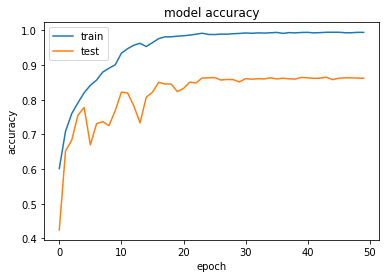

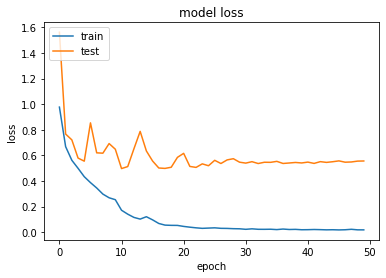

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()